Logistic Regression for Lmbalanced Datasets

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [87]:
# Generate and plot systhetic imbalance dataset 
from collections import Counter
from sklearn.datasets import make_classification

# Generate imbalanced binary classification dataset

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                          n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=10)

In [88]:
X # having 2 input feature x[0] and x[1]

array([[ 0.6492783 , -0.71728276],
       [ 1.72082859, -1.3287436 ],
       [ 1.5284087 , -1.52940959],
       ...,
       [ 0.11911167, -0.25955342],
       [ 0.17024514, -0.01168445],
       [ 1.23390289, -0.57575492]])

In [89]:
Counter(y)

Counter({np.int64(0): 9900, np.int64(1): 100})

In [90]:
x1 =pd.DataFrame(X)[0]

In [91]:
x2 = pd.DataFrame(X)[1]

<Axes: xlabel='0', ylabel='1'>

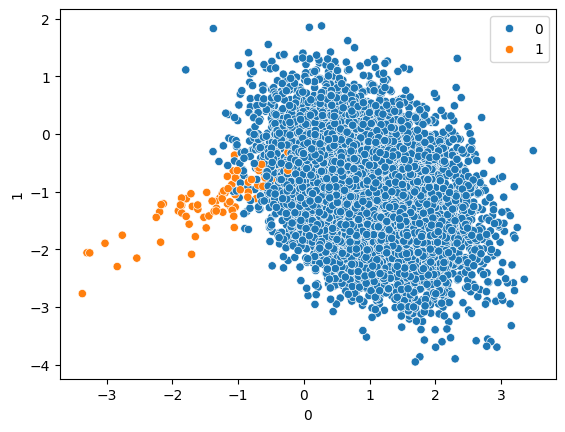

In [92]:
sns.scatterplot(x=x1, y=x2, hue=y)
# imbalanced dataset

In [93]:
# split the dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(f'Train dataset shape: {X_train.shape}, {y_train.shape}')

print(f'Test dataset shape: {X_test.shape}, {y_test.shape}')

Train dataset shape: (8000, 2), (8000,)
Test dataset shape: (2000, 2), (2000,)


In [94]:
# Hyperparameter tuning 

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Hyperparameter tuning 

from sklearn.model_selection import GridSearchCV

c_values = [0.01, 0.1, 1, 10, 100],
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

    [{0: 1, 1: 1},  --> 0 and 1 have same importance
    {0: 1, 1: 10}, --> 0 have 1 imp and 1 have 10 time more 
    {0: 1, 1: 50}, --> ....
    {0: 1, 1: 100},
    {0: 10, 1: 1},
    {0: 10, 1: 10},
    {0: 10, 1: 50},
    {0: 10, 1: 100},
    {0: 50, 1: 1},
    {0: 50, 1: 10},
    {0: 50, 1: 50},
    {0: 50, 1: 100},
    {0: 100, 1: 1},
    {0: 100, 1: 10},
    {0: 100, 1: 50},
    {0: 100, 1: 100}]

In [95]:
params = dict(penalty=penalty , C = c_values , solver=solver , class_weight = class_weight )

In [96]:
params

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'C': ([0.01, 0.1, 1, 10, 100],),
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [97]:

# Define hyperparameters
c_values = [0.01, 0.1, 1, 10, 100]  # Remove extra comma to avoid tuple issue
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight = [{0: w, 1: y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]

# Create param grid BEFORE using it
params = {
    'penalty': penalty,
    'C': c_values,
    'solver': solver,
    'class_weight': class_weight
}

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [100]:
# Initialize model
model = LogisticRegression()  # Ensure convergence

# Cross-validation strategy
cv = StratifiedKFold()

# Grid search
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=cv)

# Fit the model
grid.fit(X_train, y_train)

c:\Users\omkar\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\omkar\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\omkar\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\omkar\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\omkar\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\omkar\anaconda3\envs\ml_env\lib\site-pack

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [101]:
grid.best_params_

{'C': 0.1, 'class_weight': {0: 50, 1: 100}, 'penalty': 'l2', 'solver': 'lbfgs'}

In [103]:
y_pred = grid.predict(X_test)

In [104]:
# Performance Matrix

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1980
           1       0.71      0.60      0.65        20

    accuracy                           0.99      2000
   macro avg       0.85      0.80      0.82      2000
weighted avg       0.99      0.99      0.99      2000



In [105]:
cm

array([[1975,    5],
       [   8,   12]])

In [106]:
score

0.9935